# Análisis de reactivos desde la teoría Clásica de los test

https://cran.r-project.org/web/views/Psychometrics.html

http://www.personality-project.org/r/book/

In [114]:
#install.packages("FSelector")
library(psych, ggplot2,FSelector)

In [115]:
class_score = function(true_condition,predicted){
    #Take vectors of ceros and ones for calculate informedness (Youden's J statistic) for 2 class classificator
    ferqtabl=table(true_condition,predicted)
    ferqtabl
    total=sum(ferqtabl)
    predict_pos=sum(ferqtabl[,2])#;predict_pos
    predict_neg=sum(ferqtabl[,1])#;predict_neg
    condit_pos=sum(ferqtabl[2,])#;condit_pos
    condit_neg=sum(ferqtabl[1,])#;condit_neg
    true_pos=ferqtabl[2,2]#;true_pos
    false_pos=ferqtabl[1,2]#;false_pos
    true_neg=ferqtabl[1,1]#;true_neg
    false_neg=ferqtabl[2,1]#;false_neg
    sensitivity=true_pos/condit_pos#recall
    specificity=true_neg/condit_neg
    precision=true_pos/predict_pos
    f1_score=2*((precision*sensitivity)/(precision+sensitivity))
    youden=sensitivity+specificity-1
    
    return (c(f1_score,youden))
}

In [116]:
DATA=read.csv("res_pilot.csv")
TEST=DATA[c(4:15,17:27,30:80,82:97)]
DATA_Quest=read.csv("EstrCuest.csv")[3:7]

In [117]:
#Asignar clase pagador True a categoría A y false a las otras categorías
calif_deuda=NULL
for (calif in DATA$utm_medium){
    calif_deuda=c(calif_deuda,unlist(strsplit(as.character(calif), "_"))[1])
}
pagador=NULL
for (calif in calif_deuda){
    pagador=c(pagador,(calif=="A1"|calif=="A2"))
}
prop.table(table(pagador))

pagador
    FALSE      TRUE 
0.4901961 0.5098039 

In [118]:
# Estadísticos de los reactivos.
dat_explor=alpha(TEST)

Warning message in alpha(TEST):
“Item = A.veces.es.mejor.evitar.entrometerse.en.los.asuntos.de.los.vecinos. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Ayudar.a.otros.me.hace.sentir.bien. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Ayudo.en.las.labores.de.mi.casa. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Debo.ser.agradecido.con.lo.poco.que.tengo. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Le.digo.a.mi.familia.que.deben.ser.personas.trabajadoras. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Me.gusta.decir.la.verdad. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Me.siento.bien.cuando.actúo.de.manera.responsable. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Mi.familia.me.dice.que.debo.ser.una.persona.colaboradora. had no variance and was deleted”Warning message in alpha(TEST):
“Item = Mis.amigos.

Some items ( Algunas.veces.es.bueno.evitar.responsabilidades. Algunas.veces.un.vecino.hace.cosas.malas. Algunos.amigos.pueden.esperar.más.tiempo.para.que.yo.les.pueda.pagar. Algunos.de.mis.amigos.son.irresponsables. En.ciertas.ocasiones.mis.vecinos.son.egoístas. En.ocasiones.las.cosas.salen.diferente.de.la.manera.en.la.que.las.planeamos. Es.mejor.evitar.que.los.hijos.sean.arriesgados. Es.mejor.hacer.las.cosas.uno.mismo.si.quiere.que.salgan.bien. Es.preferible.que.los.hijos.aprendan.a.hacer.las.cosas.solos. Está.bien.darse.por.vencido.en.algunas.ocasiones. Hay.personas.que.quieren.ser.tan.responsables.como.yo.lo.soy. He.organizado.reuniones.familiares.que.han.sido.malas.experiencias. He.visto.cómo.mis.padres.se.han.atrasado.en.sus.pagos.por.comprar.alimentos. He.visto.que.algunos.de.mis.amigos.dicen.mentiras. He.visto.que.en.mi.familia.han.tenido.problemas.difíciles.de.superar. He.visto.que.mi.pareja.hace.las.cosas.bien.con.poca.organización. La.gente.dice.que.trabajo.demasiado. Las.per

Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”In smc, the correlation matrix was not invertible, smc's returned as 1s
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”In smc, the correlation matrix was not invertible, smc's returned as 1s
Warning message in cor.smooth(R):
“Matrix was not positive definite, smoothing was done”Warning message in cor.smooth(R):
“Matrix was not positive defin

In [124]:
# Filtrar por índice de dificultad los extremos de 0.15 se descartan
limit=0.01

filt_dif=dat_explor$item.stats[,"mean"]>=limit & dat_explor$item.stats[,"mean"]<=1-limit
TEST_2=TEST[,colnames(TEST)%in%rownames(dat_explor$item.stats)[filt_dif]]

table(colnames(TEST)%in%colnames(TEST_2))


FALSE  TRUE 
   21    69 

Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi-squared approximation may be incorrect”Warning message in chisq.test(table(TEST_2[, i], pagador)):
“Chi

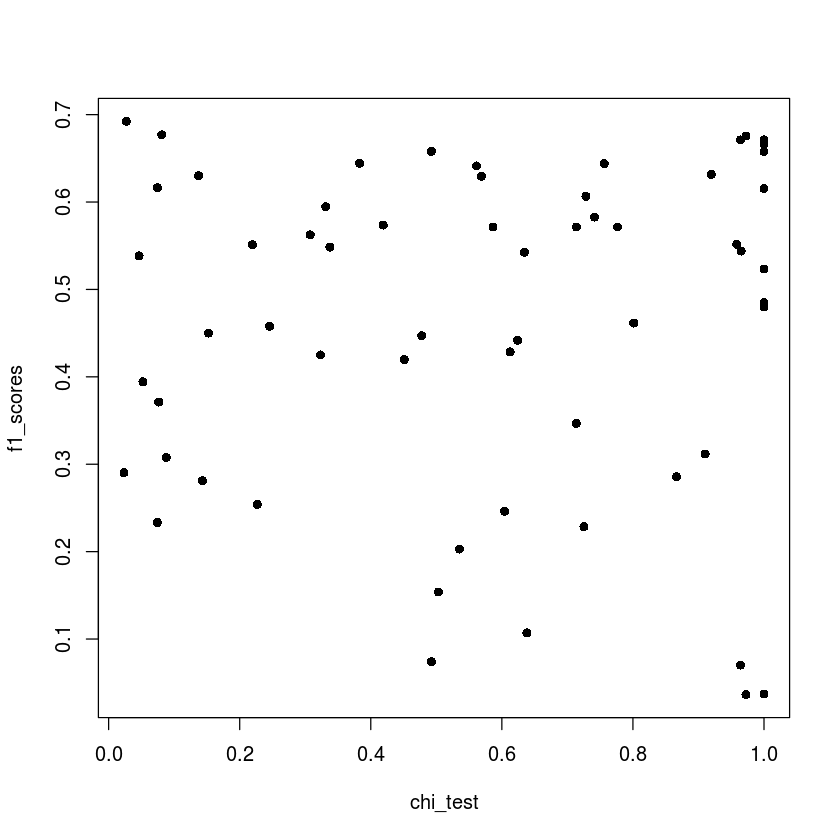

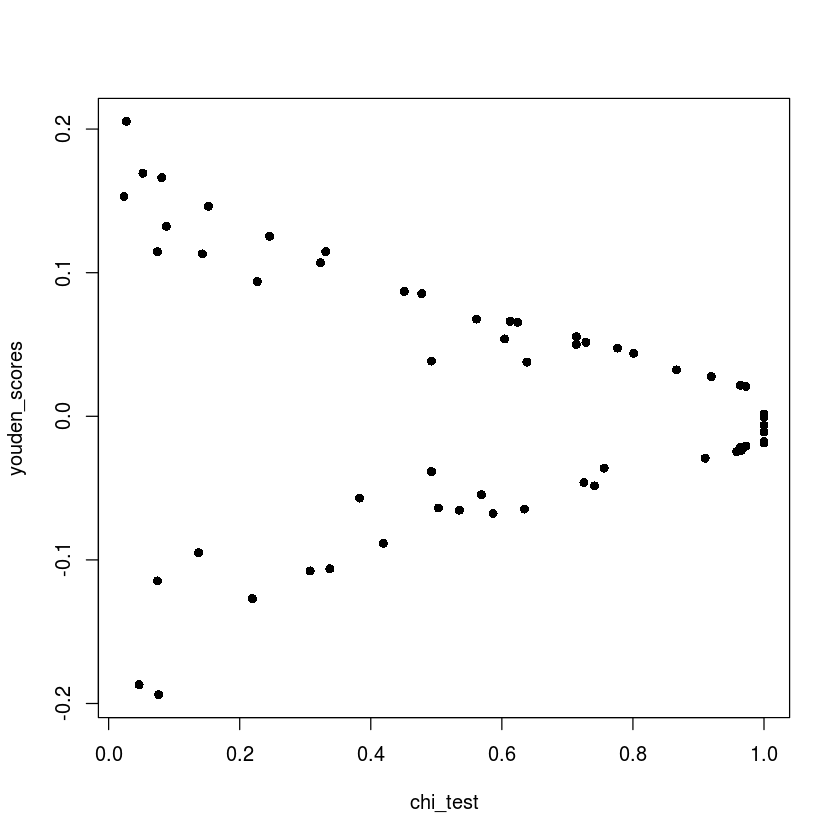

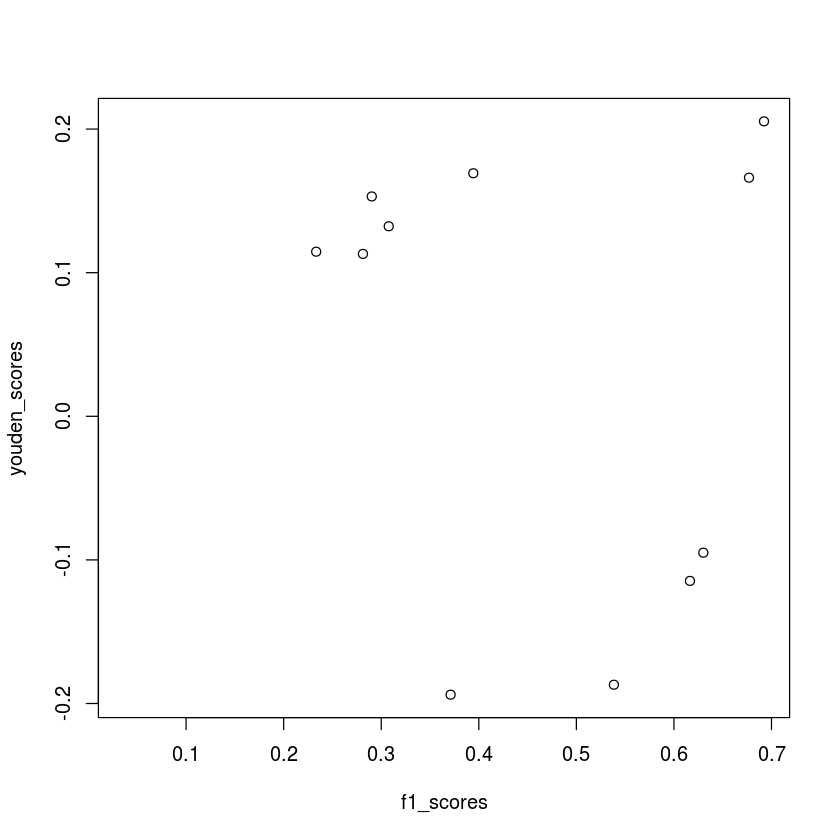

In [150]:
chi_test=NULL
f1_scores=NULL
youden_scores=NULL
for (i in 1:ncol(TEST_2)){
    #print (c(i, colnames(TEST)[i], chisq.test(table(TEST[,i],pagador))$p.value))
    chi_test=c(chi_test,chisq.test(table(TEST_2[,i],pagador))$p.value)
    scores=class_score(as.numeric(pagador),TEST_2[,i])
    f1_scores=c(f1_scores,scores[1])
    youden_scores=c(youden_scores,scores[2])
}

plot(chi_test,f1_scores, pch=16)
plot(chi_test,youden_scores, pch=16)
plot(f1_scores,youden_scores, cex=(chi_test<0.15)*1)


In [148]:
# #chi_test[chi_test<0.1]
# for (react in which(chi_test<0.1)){
#     print (table(as.numeric(pagador),TEST[,react]))
#     print (class_score(as.numeric(pagador),TEST[,react]))
#     #plot(table(as.numeric(pagador),TEST[,react]))
# }
(1-chi_test)*5

[1] 4.314048e+00 2.610819e+00 1.744825e-01 2.323874e+00 4.238674e+00
 [6] 4.738225e+00 2.775558e-15 2.537283e+00 2.537283e+00 6.674522e-01
[11] 2.537283e+00 4.560089e+00 3.342987e+00 4.627904e+00 5.551115e-16
[16] 4.882726e+00 0.000000e+00 2.193211e+00 2.537283e+00 5.551115e-16
[21] 1.358359e+00 1.118115e+00 3.771812e+00 1.808884e+00 1.373816e+00
[26] 1.880011e+00 4.617703e+00 0.000000e+00 4.284798e+00 4.767793e+00
[31] 1.358359e+00 1.793396e-01 1.432211e+00 1.827556e+00 3.462222e+00
[36] 4.016566e-01 0.000000e+00 1.880011e+00 1.978570e+00 3.085041e+00
[41] 2.775558e-15 3.383610e+00 3.311931e+00 1.293426e+00 3.902801e+00
[46] 2.904760e+00 2.743772e+00 2.067489e+00 2.155556e+00 1.793396e-01
[51] 1.219399e+00 2.067489e+00 1.375246e-01 2.775558e-15 4.627904e+00
[56] 9.937879e-01 2.484579e+00 0.000000e+00 4.864854e+00 1.375246e-01
[61] 4.594341e+00 1.665335e-15 2.537283e+00 2.082034e-01 4.492902e-01
[66] 1.937043e+00 3.865228e+00 1.431684e+00 2.775558e-15

   
     0  1
  0 40 39
  1 10 13

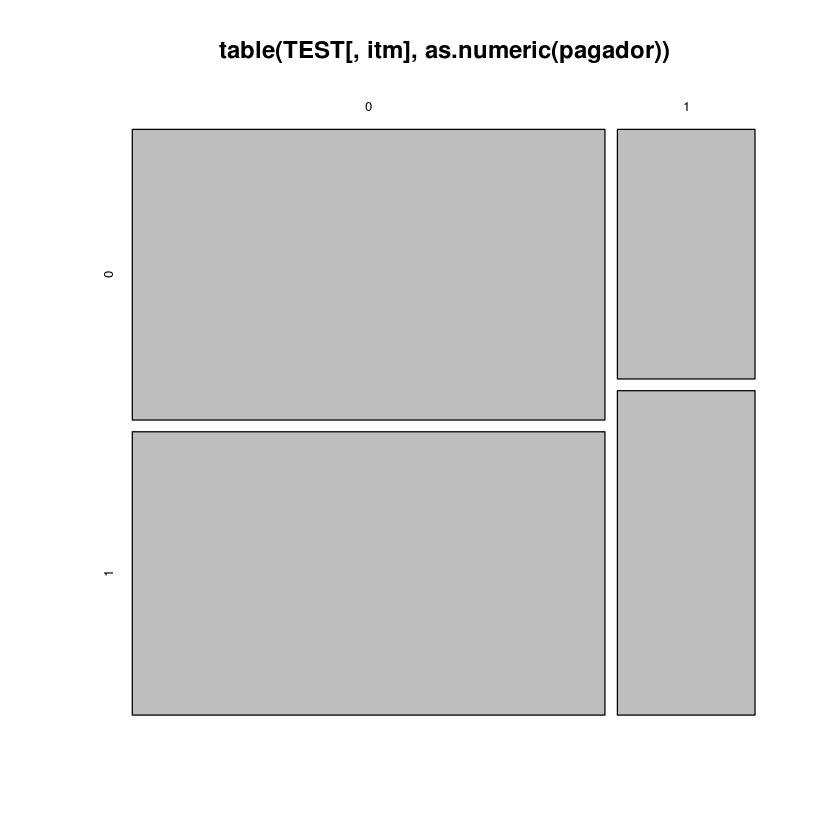

In [48]:
itm=38
table(TEST[,itm],as.numeric(pagador))
plot(table(TEST[,itm],as.numeric(pagador)))


# XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX

In [98]:
predicted=c(1,0,0,0,1,1,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,1,1,1)#react value
true_condition=c(1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,1,0,1)# clasificación pagador

In [15]:
dat_explor$item.stats[1:5,]

,n,raw.r,std.r,r.cor,r.drop,mean,sd
A.mis.hijos.les.demuestro.con.el.ejemplo.que.deben.ser.buenas.personas.,101,-0.1375631,-0.05920563,-0.08041472,-0.1914897,0.9306931,0.2552421
Algunas.veces.decir.mentiras.me.ha.evitado.problemas.,102,0.2687910,0.21598454,0.20688840,0.1682996,0.3235294,0.4701330
Algunas.veces.es.bueno.evitar.responsabilidades.,102,0.2466363,0.19145020,0.18487934,0.1428094,0.6078431,0.4906424
Algunas.veces.mis.amigos.se.dan.por.vencidos.,102,0.3247880,0.32490607,0.31179913,0.2475657,0.1666667,0.3745184
Algunas.veces.mis.hijos.dicen.mentiras.,102,0.2172813,0.19512954,0.19369762,0.1206882,0.2745098,0.4484707


In [16]:
chisq.test(table(TEST_2[,3],pagador))$p.value

[1] 0.9651035

In [17]:
table(filt_dif_2_8)
#dat_explor$item.stats[dat_explor$item.stats["mean"]>=0.05 & dat_explor$item.stats["mean"]<=0.95,"mean"]

ERROR: Error in table(filt_dif_2_8): object 'filt_dif_2_8' not found


In [18]:
resps=NULL
for (i in 1:90){
    resps[i]=sum(!is.na(TEST[i]))
}
resps

[1] 101 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102
[20] 102 102 102 102 102 102 102 101 102 102 102 102 102 101 102 102 102 102 102
[39] 102 102 102 102 102 102 102 102 101 102 102 102 102 102 102 102 102 102 102
[58] 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102 102
[77] 102 102 102 102 102 102 102 102 102 102 102 102 102 102

In [19]:
punt_part=rowSums(TEST, na.rm=T)

In [20]:
names(dat_explor)
dat_explor$total
#round(dat_explor$item.stats,2)
#round(dat_explor$Unidim,2)

[1] "total"         "alpha.drop"    "item.stats"    "response.freq"
 [5] "keys"          "scores"        "nvar"          "boot.ci"      
 [9] "boot"          "Unidim"        "Fit"           "call"         
[13] "title"

,raw_alpha,std.alpha,G6(smc),average_r,S/N,ase,mean,sd
,0.5274643,0.493963,0.913087,0.01284798,0.9761402,0.06525708,0.5461473,0.06040938


In [21]:
hist(dific_2_8$mean)

ERROR: Error in hist(dific_2_8$mean): object 'dific_2_8' not found


In [22]:
round(dat_explor$item.stats[!(dat_explor$item.stats["mean"]>=0.05 & dat_explor$item.stats["mean"]<=0.95),],2)

,n,raw.r,std.r,r.cor,r.drop,mean,sd
Algunos.amigos.pueden.esperar.más.tiempo.para.que.yo.les.pueda.pagar.,102,0.05,0.05,0.04,0.02,0.02,0.14
Algunos.de.mis.amigos.son.irresponsables.,102,0.19,0.25,0.26,0.16,0.02,0.14
Ayudo.a.mis.vecinos.cuando.lo.necesitan.,102,0.12,0.19,0.20,0.09,0.98,0.14
En.ocasiones.las.cosas.salen.diferente.de.la.manera.en.la.que.las.planeamos.,102,0.10,0.10,0.09,0.06,0.02,0.14
Es.importante.pagar.el.dinero.que.le.debo.a.mis.vecinos.,102,0.02,0.06,0.06,-0.03,0.96,0.20
Es.mejor.hacer.las.cosas.uno.mismo.si.quiere.que.salgan.bien.,102,0.05,0.09,0.09,0.02,0.01,0.10
Hago.cosas.buenas.por.mis.amigos.,102,0.16,0.25,0.25,0.13,0.98,0.14
Hay.personas.que.quieren.ser.tan.responsables.como.yo.lo.soy.,102,0.02,0.08,0.07,-0.03,0.96,0.20
He.visto.que.algunos.de.mis.amigos.dicen.mentiras.,102,0.25,0.29,0.29,0.21,0.04,0.20
Las.demás.personas.dicen.que.soy.un.ejemplo.de.superación.,102,0.01,0.03,0.01,-0.04,0.95,0.22


In [23]:
row.names(dific_2_8)

ERROR: Error in row.names(dific_2_8): object 'dific_2_8' not found


In [24]:
colMeans(TEST,na.rm=T)
#DATA_Quest

A.mis.hijos.les.demuestro.con.el.ejemplo.que.deben.ser.buenas.personas. 
                                                                 0.930693069 
         A.veces.es.mejor.evitar.entrometerse.en.los.asuntos.de.los.vecinos. 
                                                                 0.000000000 
                       Algunas.veces.decir.mentiras.me.ha.evitado.problemas. 
                                                                 0.323529412 
                            Algunas.veces.es.bueno.evitar.responsabilidades. 
                                                                 0.607843137 
                               Algunas.veces.mis.amigos.se.dan.por.vencidos. 
                                                                 0.166666667 
                                     Algunas.veces.mis.hijos.dicen.mentiras. 
                                                                 0.274509804 
                                   Algunas.veces.un.vecino.hace.cosas.malas. 
                                                                 0.186274510 
       Algunos.amigos.pueden.esperar.más.tiempo.para.que.yo.les.pueda.pagar. 
                                                                 0.019607843 
                                   Algunos.de.mis.amigos.son.irresponsables. 
                                                                 0.019607843 
                                         Ayudar.a.otros.me.hace.sentir.bien. 
                                                                 1.000000000 
                                    Ayudo.a.mis.vecinos.cuando.lo.necesitan. 
                                                                 0.980392157 
                                            Ayudo.en.las.labores.de.mi.casa. 
                                                                 1.000000000 
                                  Debo.ser.agradecido.con.lo.poco.que.tengo. 
                                                                 0.000000000 
                              En.ciertas.ocasiones.mis.vecinos.son.egoístas. 
                                                                 0.176470588 
En.ocasiones.las.cosas.salen.diferente.de.la.manera.en.la.que.las.planeamos. 
                                                                 0.019607843 
                                     En.ocasiones.mis.vecinos.son.perezosos. 
                                                                 0.127450980 
                   En.ocasiones.mostrar.bondad.puede.ser.señal.de.debilidad. 
                                                                 0.578431373 
                 Enseño.a.mis.hijos.la.importancia.de.administrar.el.dinero. 
                                                                 0.921568627 
                    Es.importante.pagar.el.dinero.que.le.debo.a.mis.vecinos. 
                                                                 0.960784314 
                             Es.mejor.evitar.que.los.hijos.sean.arriesgados. 
                                                                 0.098039216 
               Es.mejor.hacer.las.cosas.uno.mismo.si.quiere.que.salgan.bien. 
                                                                 0.009803922 
               Es.preferible.que.los.hijos.aprendan.a.hacer.las.cosas.solos. 
                                                                 0.460784314 
                           Está.bien.darse.por.vencido.en.algunas.ocasiones. 
                                                                 0.774509804 
                                           Hago.cosas.buenas.por.mis.amigos. 
                                                                 0.980392157 
               Hay.personas.que.quieren.ser.tan.responsables.como.yo.lo.soy. 
                                                                 0.960784314 
         He.organizado.reuniones.familiares.que.han.sido.malas.experiencias. 
                           

calif_deuda,Freq
A1,0.284
A2,0.225
B,0.186
C1,0.098
C2,0.039
D1,0.039
D2,0.029
E,0.098


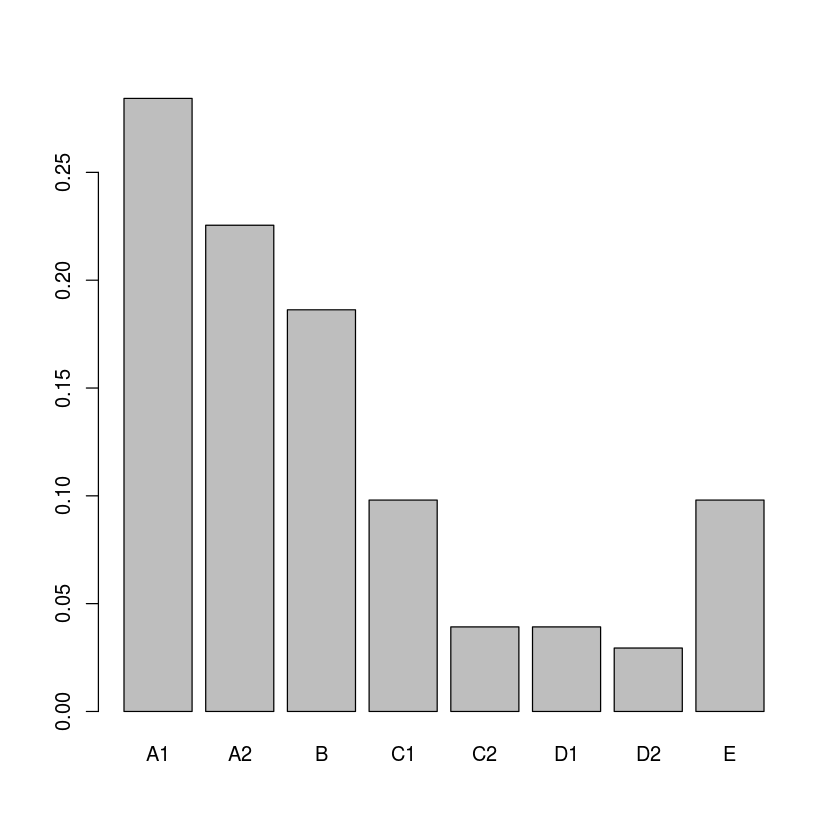

In [25]:
data.frame(round(prop.table(table(calif_deuda)),3))
barplot(prop.table(table(calif_deuda)),3)